<a href="https://colab.research.google.com/github/Danielhay016/Advanced-NLP-with-Python-for-Machine-Learning/blob/main/C4/NLP_C4_challenges.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

#To import the DistilBERT model in Python, you can use the Hugging Face transformers library, which provides a convenient interface to work with various pre-trained transformer models, including DistilBERT. First, you need to install the library:
#For this, we'll use the pipeline module from the transformers library, which provides a convenient way to perform various NLP tasks, including sentiment analysis:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
!pip install wordcloud matplotlib
%matplotlib inline

In [ ]:
# Load CSV file into a DataFrame without header
df = pd.read_csv("/content/ch4_feedback_data.csv", header=None)

In [ ]:
df.head()

,0,1
0,Your products are excellent. I really love the...,delivery to my location in Los Angeles was a ...
1,The customer service team in New York was help...,NaN
2,The new features in the latest release are fan...,NaN
3,The product didn't meet my expectations,and I'm disappointed. I hope you can address ...
4,Your products are not good. I really don't lik...,delivery to my location in Los Angeles was a ...


In [ ]:
#1: Load Pre-Trained DistilBERT model and Tokenizer

from transformers import pipeline, DistilBertModel, DistilBertTokenizer

# Load pre-trained DistilBERT model and tokenizer
model = DistilBertModel.from_pretrained("distilbert-base-uncased")
tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [ ]:
 #2: Load DistilBERT Sentiment Analysis Pipeline
# EXERCISE - COMPLETE THE CODE


# Load DistilBERT sentiment analysis pipeline - Creates a ready-made tool that performs sentiment analysis without retraining the model.
sentiment_pipeline = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")


# Iterate over the rows and perform sentiment analysis with DistilBERT
sentiment_results_bert = []
for text in df[0]:
    result = sentiment_pipeline(text)[0]  # the first item put in the first place
    sentiment_results_bert.append({
        "Text": text,
        "Label": result['label'],        # POSITIVE or NEGATIVE
        "Score": result['score']         # prediction confidence
    })

# Iterate over the sentiment results and print each entry
for entry in sentiment_results_bert:
    print(entry)


# Convert DistilBERT sentiment results to DataFrame
sentiment_df_bert = pd.DataFrame(sentiment_results_bert)

# Save DistilBERT sentiment results to a new CSV file
sentiment_df_bert.to_csv("sentiment_results_bert.csv", index=False)

config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/669M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cpu


{'Text': 'Your products are excellent. I really love the quality! However', 'Label': '5 stars', 'Score': 0.574426531791687}
{'Text': 'The customer service team in New York was helpful in resolving my issue. I appreciate the assistance. brian@email.com', 'Label': '4 stars', 'Score': 0.5543171763420105}
{'Text': 'The new features in the latest release are fantastic! They have greatly improved the user experience in San Francisco.', 'Label': '5 stars', 'Score': 0.8357025384902954}
{'Text': "The product didn't meet my expectations", 'Label': '2 stars', 'Score': 0.4780275821685791}
{'Text': "Your products are not good. I really don't like the quality! However", 'Label': '2 stars', 'Score': 0.5138061046600342}
{'Text': 'The customer service team in San Francisco was not helpful in resolving my issue. But', 'Label': '3 stars', 'Score': 0.5047702193260193}
{'Text': 'The new features in the latest release are not fantastic! They have not greatly improved the user experience in San Francisco.', 

In [ ]:
 #3 (Optional): Exploratory Data Analysis
sentiment_df_bert.head()

,Text,Label,Score
0,Your products are excellent. I really love the...,5 stars,0.574427
1,The customer service team in New York was help...,4 stars,0.554317
2,The new features in the latest release are fan...,5 stars,0.835703
3,The product didn't meet my expectations,2 stars,0.478028
4,Your products are not good. I really don't lik...,2 stars,0.513806


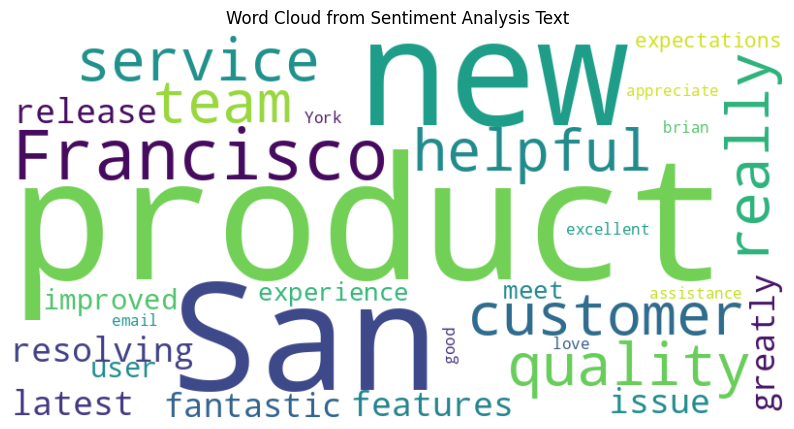

In [ ]:
from wordcloud import WordCloud


# Assuming you have already performed sentiment analysis and have sentiment_df_bert DataFrame - Word Cloud


# Combine all text data into a single string for word cloud generation
text_combined = ' '.join(sentiment_df_bert['Text'])

# Create a WordCloud object with specific settings (e.g., background color, colormap)
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text_combined)

# Plot the word cloud using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Remove axes for better visualization
plt.title('Word Cloud from Sentiment Analysis Text')
plt.show()

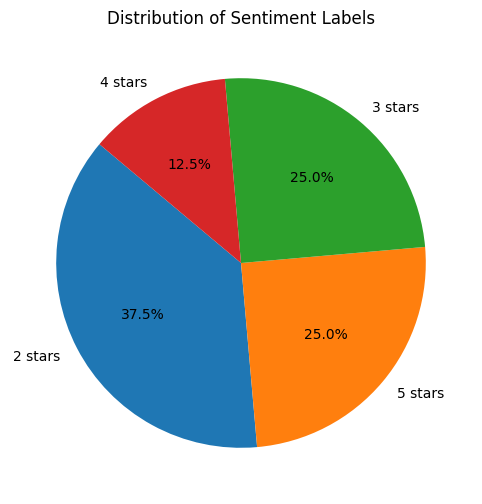

In [ ]:
# Count the occurrences of each sentiment label - Pie Chart


sentiment_label_counts = sentiment_df_bert['Label'].value_counts()

# Plotting pie chart for sentiment labels
plt.figure(figsize=(8, 6))
plt.pie(sentiment_label_counts, labels=sentiment_label_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Sentiment Labels')
plt.show()

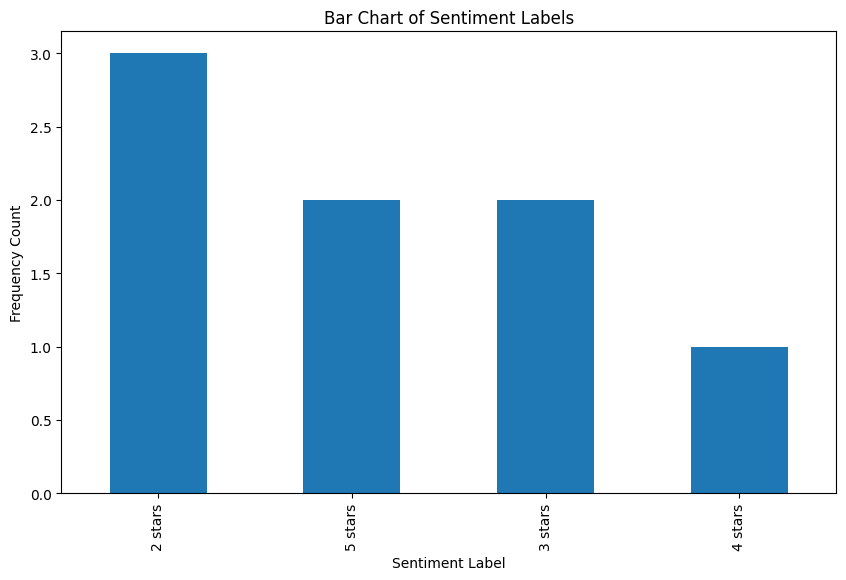

In [ ]:
# Count the occurrences of each sentiment label for visualization - Bar Chart


sentiment_label_counts = sentiment_df_bert['Label'].value_counts()

# Plotting stacked bar chart for sentiment labels
plt.figure(figsize=(10, 6))
sentiment_label_counts.plot(kind='bar', stacked=True)
plt.title('Bar Chart of Sentiment Labels')
plt.xlabel('Sentiment Label')
plt.ylabel('Frequency Count')
plt.show()
